# Kaggle House Prices Contest

### import all packages that will be needed to finish analysis.

In [74]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pivottablejs import pivot_ui
import statsmodels.api as sm

### import data from csv files

In [75]:
test = pd.read_csv('test.csv', sep = ',')
train = pd.read_csv('train.csv', sep = ',')

In [76]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Separate SalePrice from DF. Combine the two DFs.

In [77]:
SalePrice = train.SalePrice

In [78]:
train = train.drop(['SalePrice'], axis = 1)

In [79]:
combine = pd.concat([train, test])

In [80]:
combine.shape

(2919, 80)

In [81]:
combine.columns = combine.columns.str.replace(" ", "_")

In [82]:
combine.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


check for NaNs

In [83]:
combine.isnull().sum().sum()

13965

In [84]:
NaNlist = pd.DataFrame(combine.isnull().sum().sort_values(ascending = False), columns = ['total'])

In [85]:
NaNlist = NaNlist[NaNlist.total > 0]
NaNlist

,total
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
FireplaceQu,1420
LotFrontage,486
GarageCond,159
GarageQual,159
GarageYrBlt,159
GarageFinish,159


In [86]:
NaNcolnames = NaNlist.index.values.tolist()

In [87]:
combine[NaNcolnames].dtypes

PoolQC           object
MiscFeature      object
Alley            object
Fence            object
FireplaceQu      object
LotFrontage     float64
GarageCond       object
GarageQual       object
GarageYrBlt     float64
GarageFinish     object
GarageType       object
BsmtCond         object
BsmtExposure     object
BsmtQual         object
BsmtFinType2     object
BsmtFinType1     object
MasVnrType       object
MasVnrArea      float64
MSZoning         object
BsmtHalfBath    float64
Utilities        object
Functional       object
BsmtFullBath    float64
BsmtFinSF1      float64
Exterior1st      object
Exterior2nd      object
BsmtFinSF2      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
SaleType         object
Electrical       object
KitchenQual      object
GarageArea      float64
GarageCars      float64
dtype: object

In [17]:
colnames = combine.columns

In [18]:
for name in colnames:
    if combine[name].dtype == 'O':
        combine[[name]] = combine[[name]].fillna('None')
    else:
        combine[[name]] = combine[[name]].fillna(0)

In [19]:
combine.isnull().sum().sum()

0

In [20]:
combine.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal


Align all dtypes with correct types

In [21]:
cols = combine.columns.tolist()

In [22]:
cols

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [23]:
types = combine.dtypes.tolist()

In [24]:
data_types = pd.DataFrame({'Column_Names':cols,'Data_Type':types})

In [25]:
pd.options.display.max_rows
data_types

,Column_Names,Data_Type
0,Id,int64
1,MSSubClass,int64
2,MSZoning,object
3,LotFrontage,float64
4,LotArea,int64
...,...,...
75,MiscVal,int64
76,MoSold,int64
77,YrSold,int64
78,SaleType,object


In [26]:
data_types.loc[data_types.Data_Type == 
              'int64']

,Column_Names,Data_Type
0,Id,int64
1,MSSubClass,int64
4,LotArea,int64
17,OverallQual,int64
18,OverallCond,int64
19,YearBuilt,int64
20,YearRemodAdd,int64
43,1stFlrSF,int64
44,2ndFlrSF,int64
45,LowQualFinSF,int64


INT64 that should be object.
MSSubClass is a dwelling type.
OverallQual is an ordinal 1-10 value for quality.
OverallCondition is an ordinal 1-10 for quality.
YearBuilt is a year.
YearRemodAdd is a year.
MoSold is a month.
YrSold is a year.

In [27]:
combine = combine.astype({'MSSubClass': object, 'OverallQual': object, 'OverallCond': object, 'YearBuilt': object,
               'YearRemodAdd': object, 'MoSold': object, 'YrSold': object})

In [28]:
combine.dtypes

Id                 int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold            object
YrSold            object
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [29]:
data_types.loc[data_types.Data_Type == 'float64']

,Column_Names,Data_Type
3,LotFrontage,float64
26,MasVnrArea,float64
34,BsmtFinSF1,float64
36,BsmtFinSF2,float64
37,BsmtUnfSF,float64
38,TotalBsmtSF,float64
47,BsmtFullBath,float64
48,BsmtHalfBath,float64
59,GarageYrBlt,float64
61,GarageCars,float64


All seem fine.

Descriptive Stats on combine DF

In [30]:
combine.describe()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.766701,10168.114080,101.396026,441.272011,49.565262,560.579993,1051.417266,1159.581706,336.483727,...,1870.364166,1.766016,472.712573,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968
std,842.787043,33.481636,7886.996359,178.854579,455.606014,169.179104,439.590889,441.120498,392.362079,428.701456,...,449.686321,0.762196,215.535686,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211
min,1.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,730.500000,43.000000,7478.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,...,1957.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1460.000000,63.000000,9453.000000,0.000000,368.000000,0.000000,467.000000,989.000000,1082.000000,0.000000,...,1977.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2189.500000,78.000000,11570.000000,163.500000,733.000000,0.000000,805.000000,1302.000000,1387.500000,704.000000,...,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2919.000000,313.000000,215245.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,...,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000


Get dummies for objects

In [31]:
combine_obj = combine.select_dtypes('object')

In [32]:
combine_obj = combine.select_dtypes(include = 'object')

In [33]:
combine_obj.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,None,None,None,2,2008,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,None,None,None,5,2007,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,None,None,None,9,2008,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,None,None,None,2,2006,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,None,None,None,12,2008,WD,Normal


In [34]:
combine_obj = pd.get_dummies(combine_obj)

In [35]:
combine_obj.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


Index by float variables

In [36]:
combine_float = combine.select_dtypes('float64')

In [37]:

combine_int = combine.select_dtypes('int64')

In [38]:
combine_float.head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,65.0,196.0,706.0,0.0,150.0,856.0,1.0,0.0,2003.0,2.0,548.0
1,80.0,0.0,978.0,0.0,284.0,1262.0,0.0,1.0,1976.0,2.0,460.0
2,68.0,162.0,486.0,0.0,434.0,920.0,1.0,0.0,2001.0,2.0,608.0
3,60.0,0.0,216.0,0.0,540.0,756.0,1.0,0.0,1998.0,3.0,642.0
4,84.0,350.0,655.0,0.0,490.0,1145.0,1.0,0.0,2000.0,3.0,836.0


In [39]:
combine_float.columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [40]:
combine_int.columns

Index(['Id', 'LotArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [41]:
Id = combine_int.Id

In [42]:
combine_int = combine_int.drop(['Id'], axis = 1)

In [43]:
combine_nums = pd.concat([combine_float, combine_int])

In [44]:
combine_nums.columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'LotArea', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

## creation of some predictors

In [45]:
combine_nums['TotalBaths'] = combine_nums['BsmtFullBath'] + combine_nums['BsmtHalfBath'] + combine_nums['FullBath'] + combine_nums['HalfBath']


# Visualizations

<IPython.core.display.Javascript object>


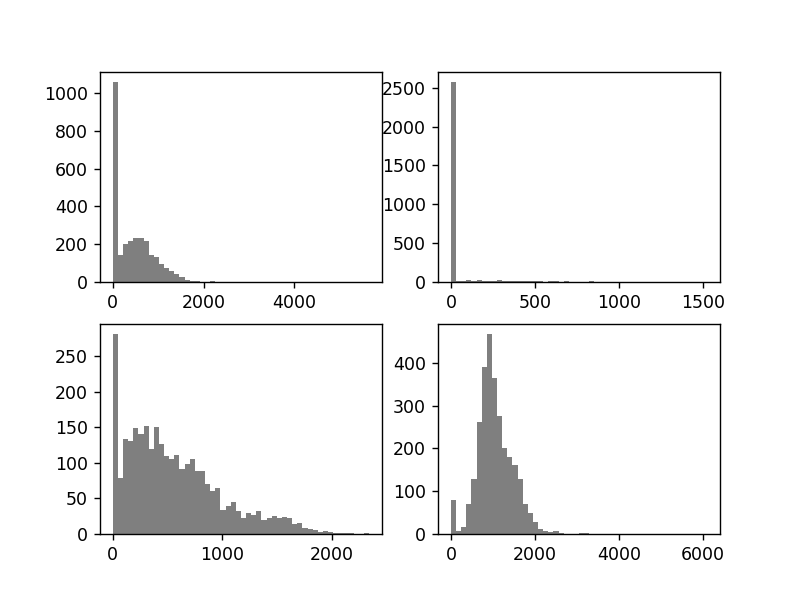

(array([ 80.,   7.,  17.,  69., 129., 261., 389., 467., 364., 276., 200.,
        180., 160., 129.,  71.,  50.,  28.,  12.,   8.,   4.,   8.,   3.,
          0.,   1.,   0.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0. ,  122.2,  244.4,  366.6,  488.8,  611. ,  733.2,  855.4,
         977.6, 1099.8, 1222. , 1344.2, 1466.4, 1588.6, 1710.8, 1833. ,
        1955.2, 2077.4, 2199.6, 2321.8, 2444. , 2566.2, 2688.4, 2810.6,
        2932.8, 3055. , 3177.2, 3299.4, 3421.6, 3543.8, 3666. , 3788.2,
        3910.4, 4032.6, 4154.8, 4277. , 4399.2, 4521.4, 4643.6, 4765.8,
        4888. , 5010.2, 5132.4, 5254.6, 5376.8, 5499. , 5621.2, 5743.4,
        5865.6, 5987.8, 6110. ]),
 <a list of 50 Patch objects>)

In [46]:
fig, axes = plt.subplots(2,2)
axes[0,0].hist(combine.BsmtFinSF1, bins = 50, color = 'k', alpha = 0.5)
axes[0,1].hist(combine.BsmtFinSF2, bins = 50, color = 'k', alpha = 0.5)
axes[1,0].hist(combine.BsmtUnfSF, bins = 50, color = 'k', alpha = 0.5)
axes[1,1].hist(combine.TotalBsmtSF, bins = 50, color = 'k', alpha = 0.5)

In [48]:
combine.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal


<IPython.core.display.Javascript object>


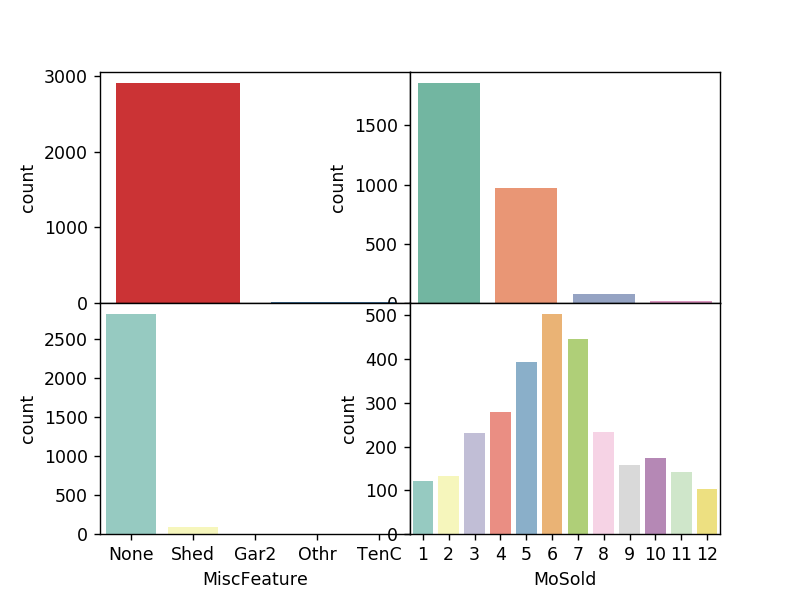

In [49]:
f, axes = plt.subplots(2,2)
sns.countplot(combine.Street, ax = axes[0,0], palette = 'Set1')
sns.countplot(combine.LotShape, ax = axes[0,1], palette = 'Set2')
sns.countplot(combine.MiscFeature, ax = axes[1,0], palette = 'Set3')
sns.countplot(combine.MoSold, ax = axes[1,1], palette = 'Set3')
plt.subplots_adjust(wspace = 0, hspace = 0)

<IPython.core.display.Javascript object>


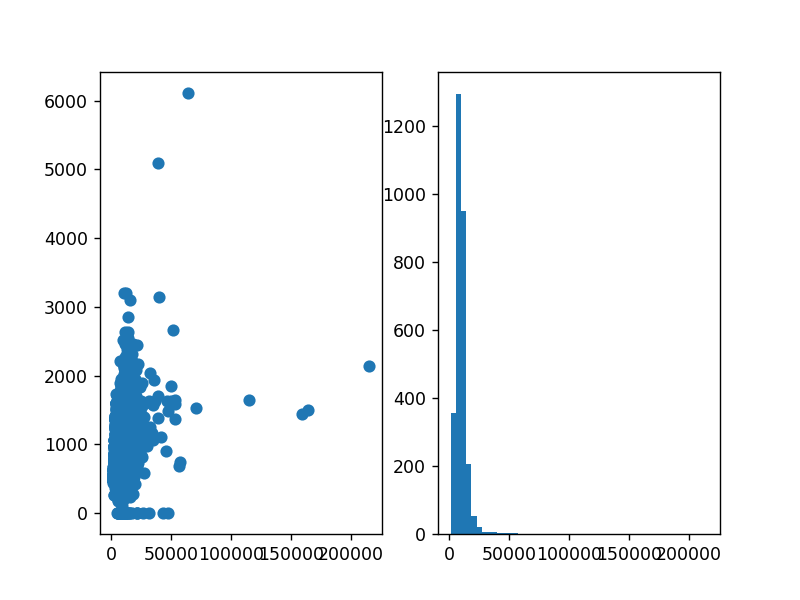

(array([3.560e+02, 1.294e+03, 9.510e+02, 2.070e+02, 5.200e+01, 2.000e+01,
        6.000e+00, 7.000e+00, 5.000e+00, 3.000e+00, 4.000e+00, 3.000e+00,
        4.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1300. ,   5578.9,   9857.8,  14136.7,  18415.6,  22694.5,
         26973.4,  31252.3,  35531.2,  39810.1,  44089. ,  48367.9,
         52646.8,  56925.7,  61204.6,  65483.5,  69762.4,  74041.3,
         78320.2,  82599.1,  86878. ,  91156.9,  95435.8,  99714.7,
        103993.6, 108272.5, 112551.4, 116830.3, 121109.2, 125388.1,
        129667. , 133945.9, 138224.8

In [50]:
f, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(combine.LotArea, combine.TotalBsmtSF)
ax2.hist(combine.LotArea, bins = 50)

<IPython.core.display.Javascript object>


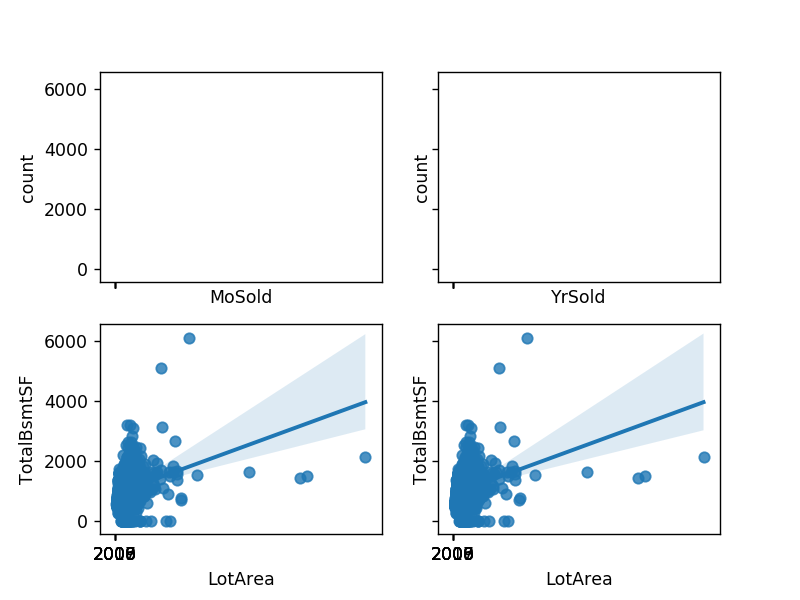

In [51]:
fig, axs = plt.subplots(2,2, sharex = True, sharey = True)
sns.countplot(combine.MoSold, ax = axs[0,0])
sns.countplot(combine.YrSold, ax = axs[0,1])
sns.regplot(combine.LotArea, combine.TotalBsmtSF, ax = axs[1,0])
sns.regplot(combine.LotArea, combine.TotalBsmtSF, ax = axs[1,1])

<IPython.core.display.Javascript object>


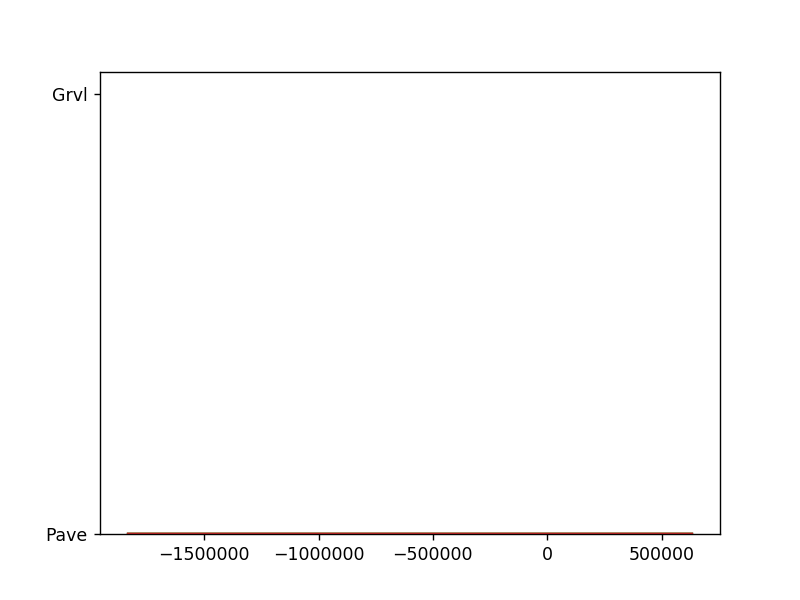

<BarContainer object of 2919 artists>

In [52]:
fig, ax = plt.subplots(1,1)
ax.bar(combine.MSSubClass, combine.Street)

In [105]:
combine.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [110]:
cross = pd.crosstab(index = train.RoofMatl, columns = train.Fireplaces, values = train.SalePrice, aggfunc = np.mean).round(0)

In [113]:
cross

Fireplaces,0,1,2,3
RoofMatl,,,,
ClyTile,NaN,NaN,NaN,160000.0
CompShg,141341.0,211276.0,234604.0,275000.0
Membran,NaN,NaN,241500.0,NaN
Metal,NaN,NaN,180000.0,NaN
Roll,137000.0,NaN,NaN,NaN
Tar&Grv,131500.0,207662.0,199500.0,NaN
WdShake,NaN,241400.0,NaN,NaN
WdShngl,168500.0,331500.0,503333.0,NaN


In [54]:
Y = SalePrice
X = train.LotArea

In [55]:
model = sm.OLS(Y,X).fit()

In [56]:
model.params

LotArea    10.048411
dtype: float64

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.544
Model:                            OLS   Adj. R-squared (uncentered):              0.543
Method:                 Least Squares   F-statistic:                              1737.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):                   9.42e-251
Time:                        21:25:42   Log-Likelihood:                         -19302.
No. Observations:                1460   AIC:                                  3.861e+04
Df Residuals:                    1459   BIC:                                  3.861e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LotArea       10.0484      0.241     41.683      0.000       9.576      10.521
==============================================================================
Omnibus:                     1902.440   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           622467.528
Skew:                          -6.735   Prob(JB):                         0.00
Kurtosis:                     103.254   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
model.resid

0       123590.930193
1        85035.257971
2       110455.380435
3        44037.678503
4       106709.664445
            ...      
1455     95446.733058
1456     77612.189976
1457    175642.271102
1458     44484.593928
1459     47648.943590
Length: 1460, dtype: float64

<IPython.core.display.Javascript object>


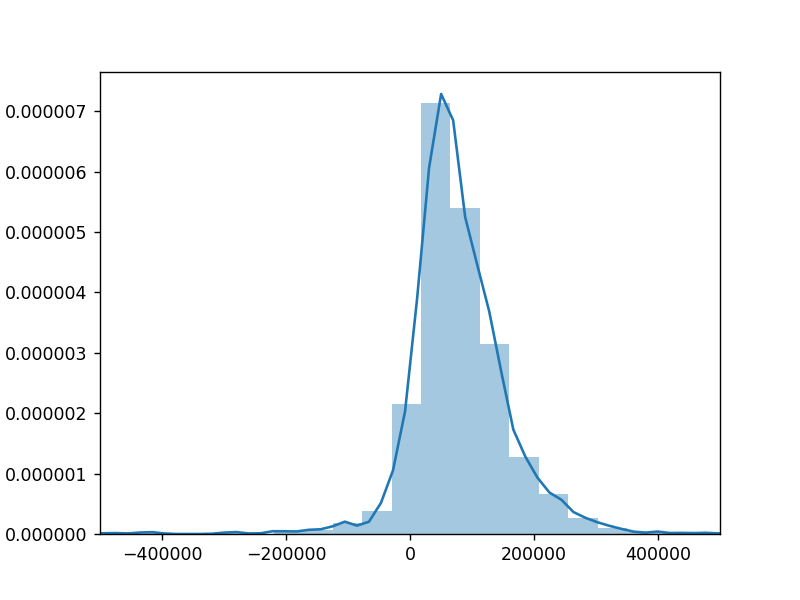

In [73]:
fig, ax =  plt.subplots(1,1)
plt.xlim(-500000,500000)
ax = sns.distplot(model.resid)


In [66]:
ax